In [82]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, accuracy_score

In [2]:
df = pd.read_csv('Bike_Sales.csv', parse_dates=['Date'])

In [3]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [5]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [6]:
df.shape

(113036, 18)

# Numerical analysis and visualization

<AxesSubplot:>

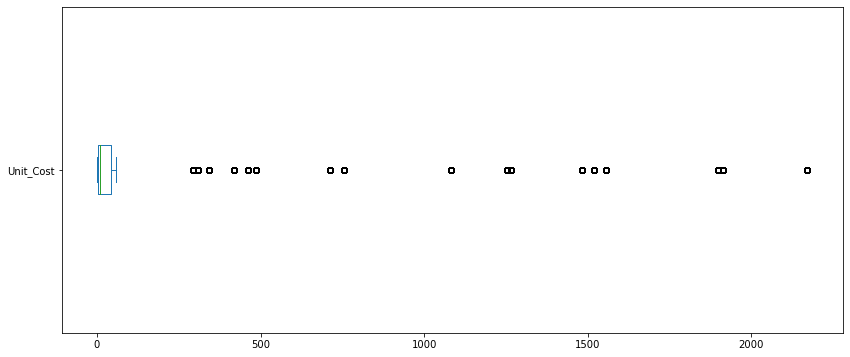

In [7]:
df['Unit_Cost'].plot(kind = 'box', vert = False, figsize = (14, 6))

<AxesSubplot:ylabel='Density'>

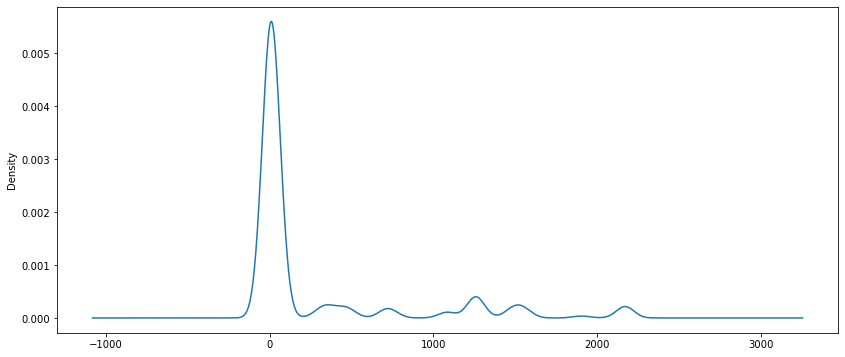

In [8]:
df['Unit_Cost'].plot(kind = 'density', figsize = (14, 6))

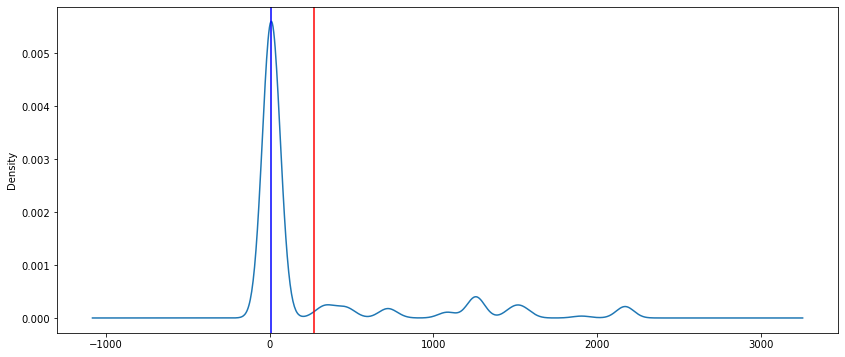

In [9]:
ax = df['Unit_Cost'].plot(kind = 'density', figsize = (14, 6))
ax.axvline(df['Unit_Cost'].mean(), color = 'red')
ax.axvline(df['Unit_Cost'].median(), color = 'blue')

Text(0.5, 0, 'Dollars')

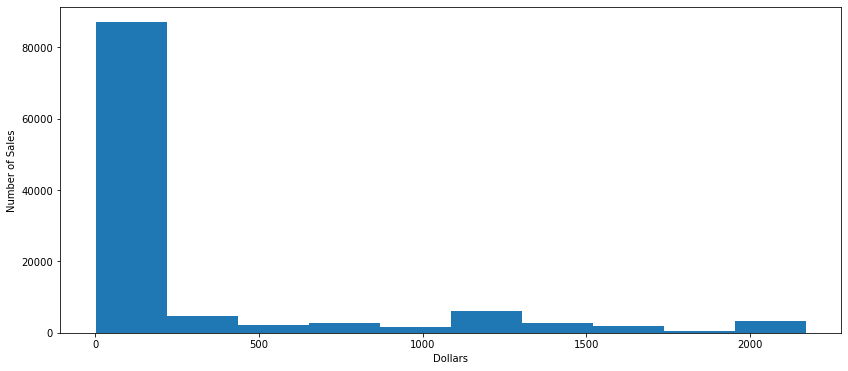

In [10]:
ax = df['Unit_Cost'].plot(kind = 'hist', figsize = (14, 6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

## Categorical analysis and visualization

In [11]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [12]:
df['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

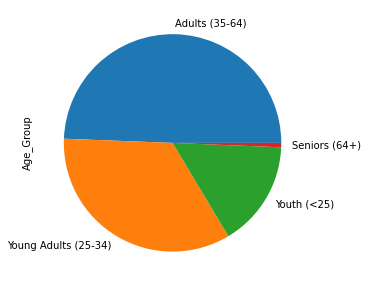

In [13]:
df['Age_Group'].value_counts().plot(kind = 'pie', figsize = (5,5))

Text(0, 0.5, 'Number of sales')

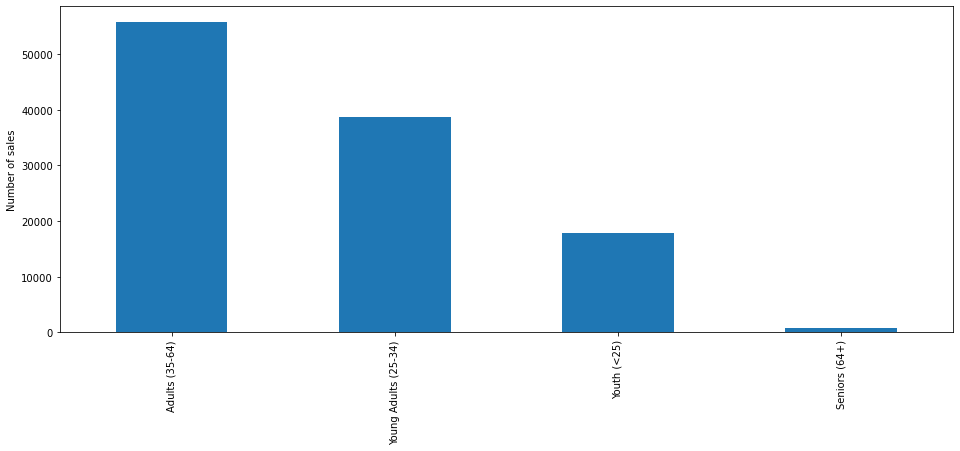

In [14]:
a = df['Age_Group'].value_counts().plot(kind = 'bar', figsize = (16, 6))
a.set_ylabel('Number of sales')

In [15]:
corr = df.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


<AxesSubplot:>

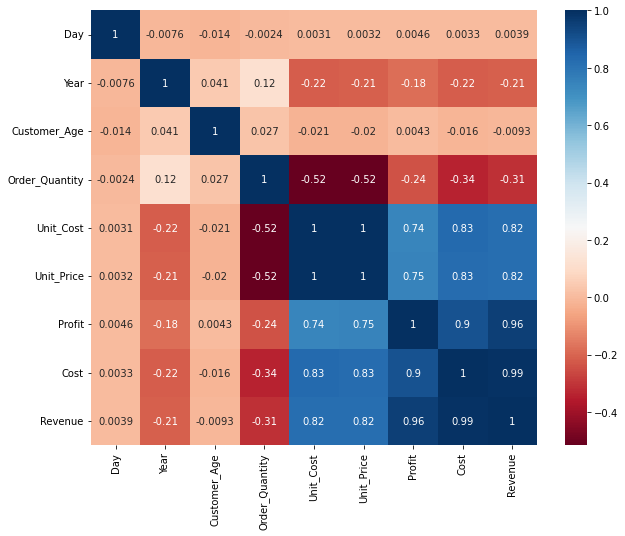

In [16]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = 'RdBu', annot = True)

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

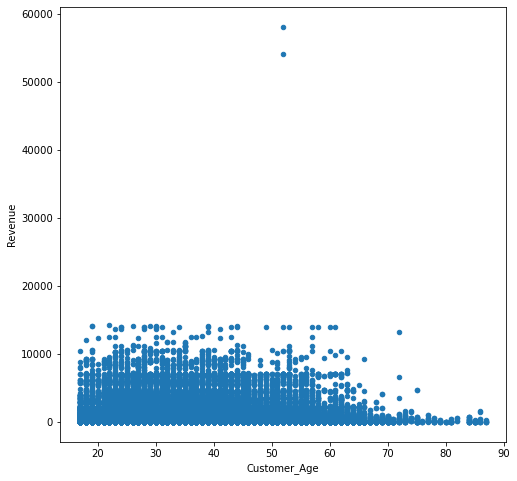

In [17]:
df.plot(kind = 'scatter', x = 'Customer_Age', y = 'Revenue', figsize = (8,8))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

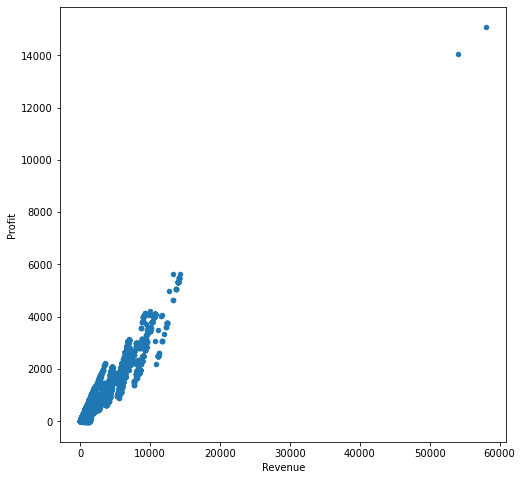

In [18]:
df.plot(kind = 'scatter', x = 'Revenue', y = 'Profit', figsize = (8,8))

In [19]:
df[['Revenue', 'Profit']].corr()

,Revenue,Profit
Revenue,1.000000,0.956572
Profit,0.956572,1.000000


<AxesSubplot:title={'center':'Profit'}, xlabel='[Age_Group]'>

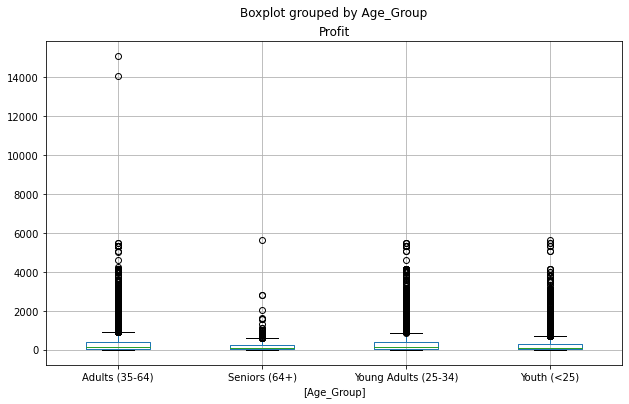

In [20]:
df[['Profit', 'Age_Group']].boxplot(by = 'Age_Group', figsize = (10, 6))

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Price              AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Cost            AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

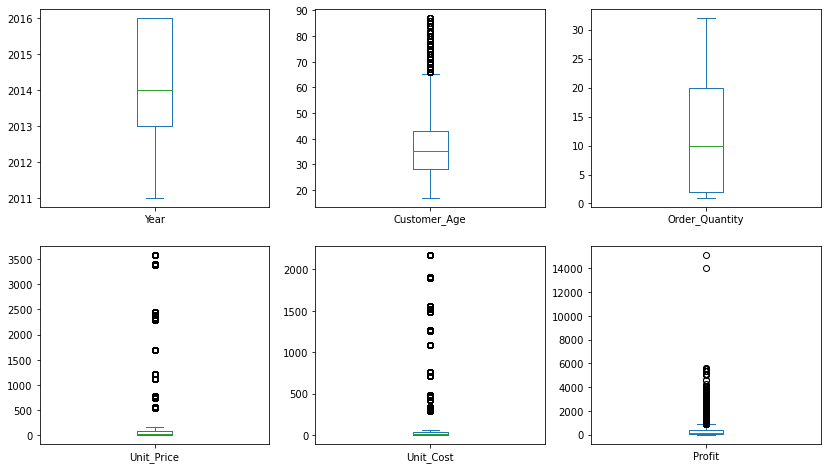

In [21]:
boxplotcol = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Price', 'Unit_Cost', 'Profit']
df[boxplotcol].plot(kind = 'box', subplots = True, layout = (2,3), figsize = (14,8))

### Data Wrangling 

In [22]:
df['Calculated_Cost'] = df['Order_Quantity'] * df['Unit_Cost']

df['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [23]:
(df['Calculated_Cost'] != df['Cost']).sum()

0

In [24]:
df.loc[df['Calculated_Cost'] != df['Cost']]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost


<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

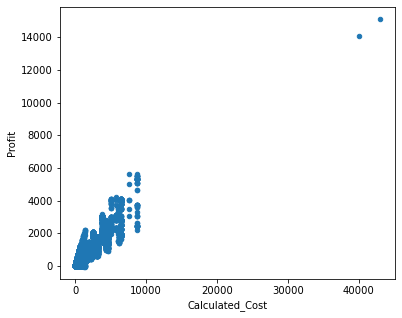

In [25]:
df.plot(kind = 'scatter', x = 'Calculated_Cost', y = 'Profit', figsize = (6,5))

In [26]:
df['Calculated_Revenue'] = df['Cost'] + df['Profit']

In [27]:
(df['Calculated_Revenue'] != df['Revenue']).sum()

0

<AxesSubplot:ylabel='Frequency'>

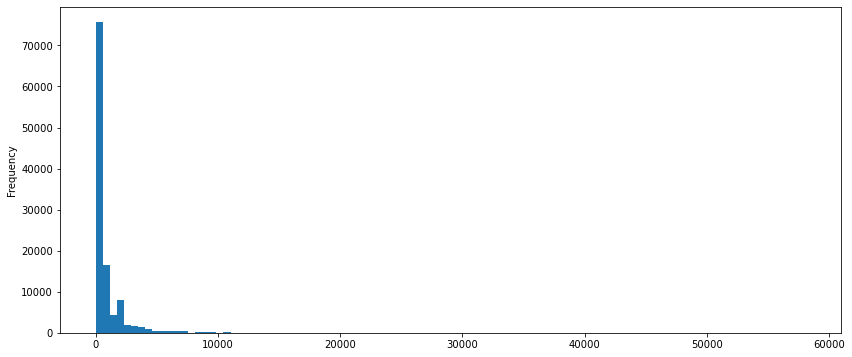

In [28]:
df['Revenue'].plot(kind = 'hist', bins = 100, figsize = (14, 6))

In [29]:
df['Unit_Price'] *= 1.03
df['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

In [30]:
df.loc[df['State'] == 'Kentucky'].head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22.66,142,96,238,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22.66,165,112,277,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,377,914


In [31]:
df.loc[df['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

In [32]:
df.loc[(df['Age_Group'] == 'Adults (35-64)') | (df['Age_Group'] == 'Youth (<25)')].shape[0]

73652

In [33]:
df.loc[(df['Age_Group'] == 'Adults (35-64)') & (df['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

In [34]:
df.loc[(df['Country'] == 'France'), 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [35]:
df.loc[(df['Country'] == 'France'), 'Revenue'] *= 1.1
df.loc[(df['Country'] == 'France'), 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

### Hands on exercises

In [36]:
df['Customer_Age'].mean()

35.91921157861212

<AxesSubplot:ylabel='Density'>

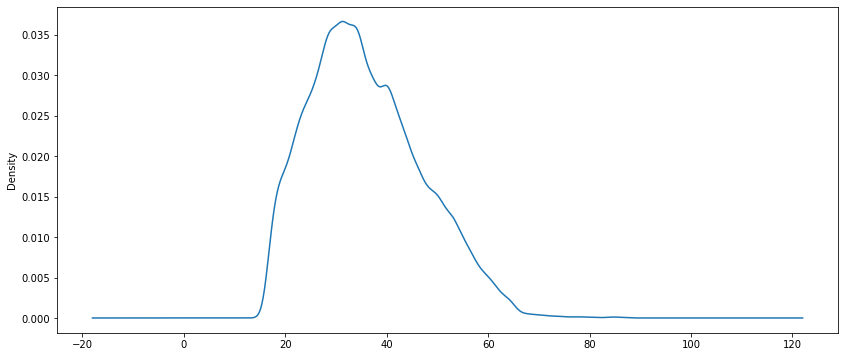

In [37]:
df['Customer_Age'].plot(kind='kde', figsize = (14, 6))

<AxesSubplot:>

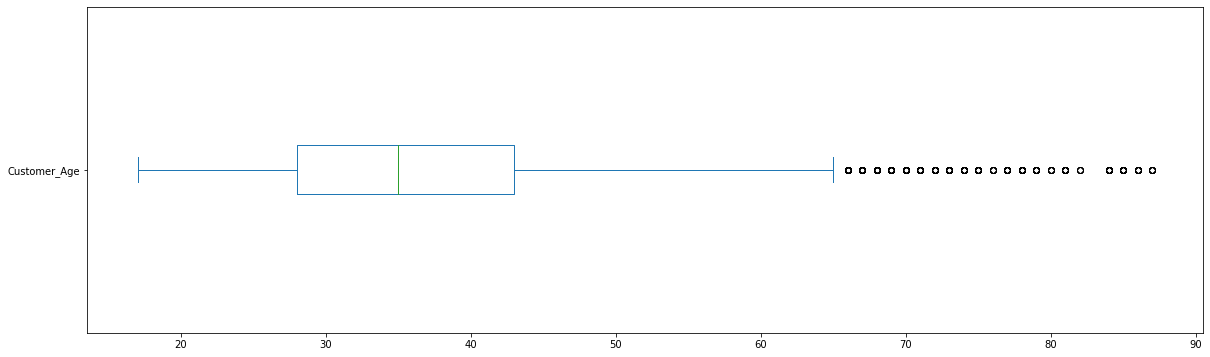

In [38]:
df['Customer_Age'].plot(kind = 'box',vert = False, figsize= (20,6))

<AxesSubplot:xlabel='Age_Group'>

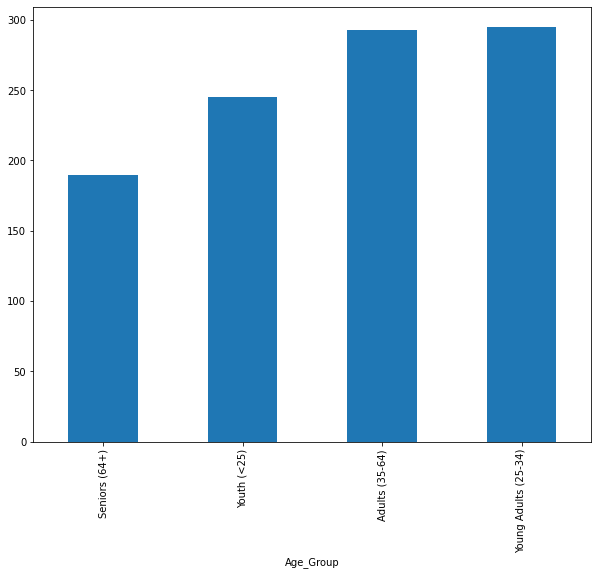

In [39]:
df.groupby('Age_Group')['Profit'].mean().sort_values().plot(kind = 'bar', figsize = (10, 8))

Text(0.5, 1.0, 'Customers by Age Group and Gender (Cyan for Female, Blue for Male)')

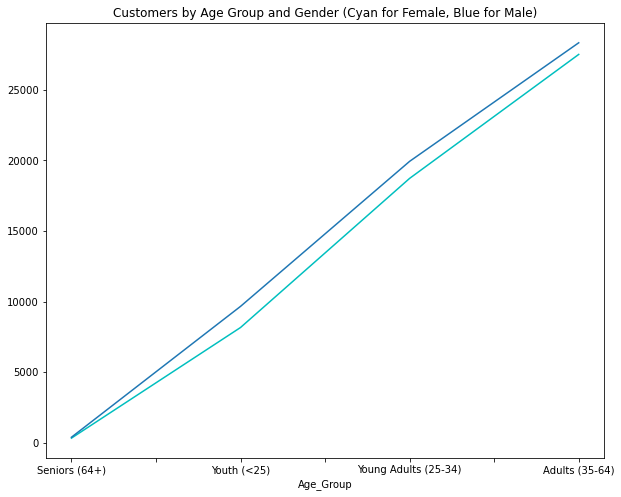

In [40]:
plt.figure(figsize = (10, 8))
df[df['Customer_Gender'] == 'F'].groupby('Age_Group')['Age_Group'].count().sort_values().plot.line(color = 'c')
df[df['Customer_Gender'] == 'M'].groupby('Age_Group')['Age_Group'].count().sort_values().plot.line()
plt.title('Customers by Age Group and Gender (Cyan for Female, Blue for Male)')

<AxesSubplot:ylabel='Density'>

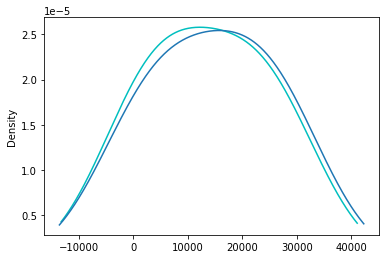

In [41]:
df[df['Customer_Gender'] == 'F'].groupby('Age_Group')['Age_Group'].count().plot.kde(color = 'c')
df[df['Customer_Gender'] == 'M'].groupby('Age_Group')['Age_Group'].count().plot.kde()

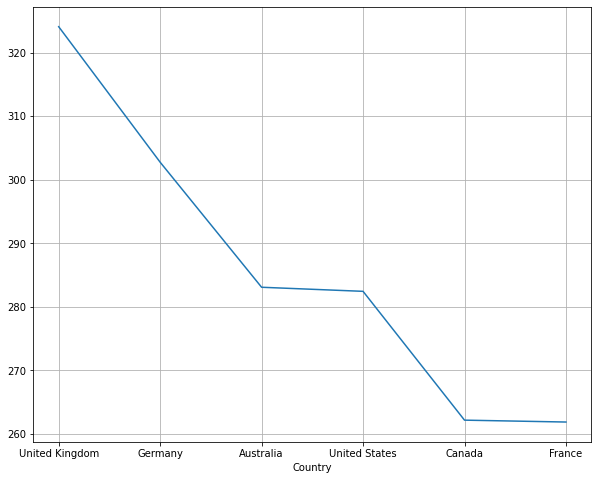

In [42]:
plt.figure(figsize = (10, 8))
df.groupby('Country')['Profit'].mean().sort_values(ascending = False).head(6).plot.line()
plt.grid()

In [43]:
df['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [44]:
df['Date'].min(), df['Date'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2016-07-31 00:00:00'))

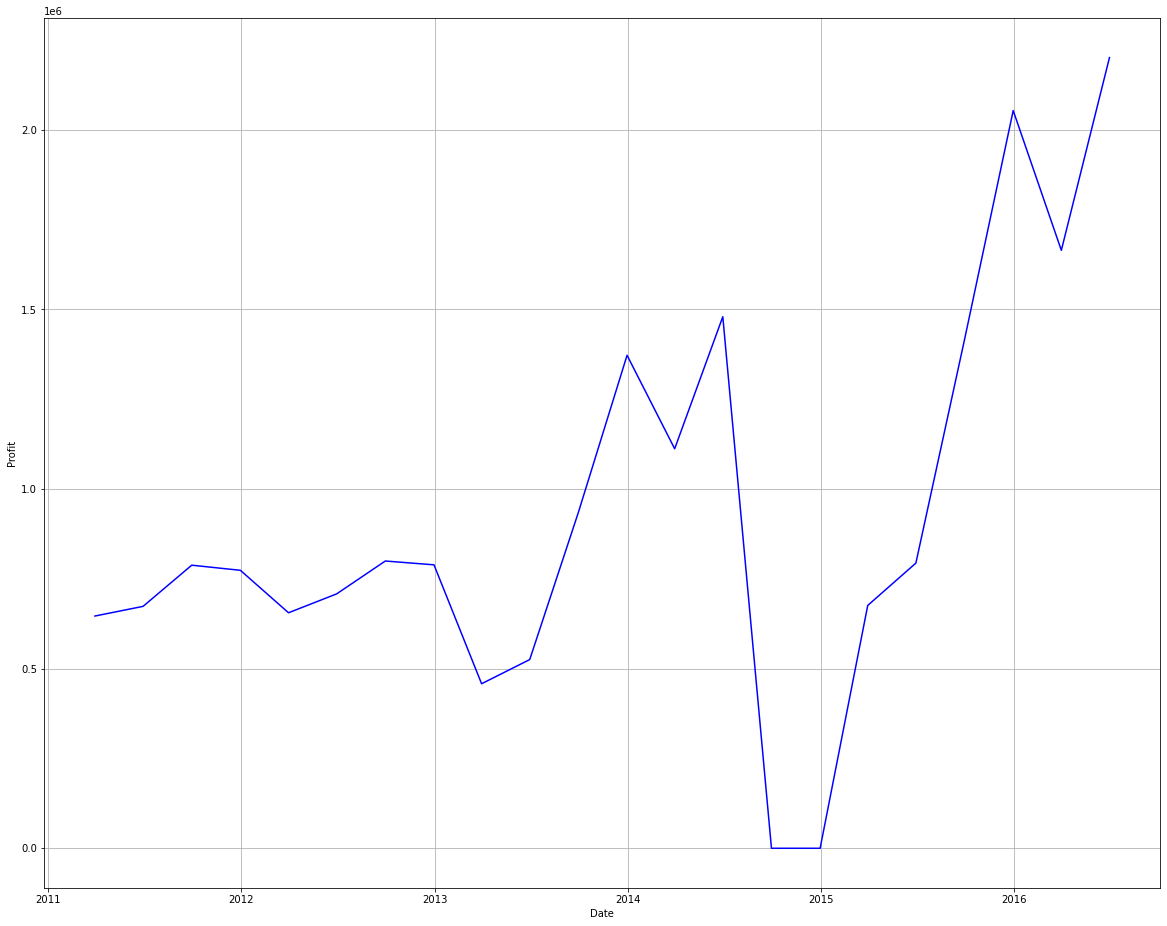

In [45]:
dc = df[df['Product_Category'] == 'Bikes'][['Date', 'Profit']]
dc = dc.set_index(dc['Date']).drop('Date', axis = 1).resample('Q').sum()
plt.figure(figsize = (20, 16))
sns.lineplot(x = dc.index, y = dc['Profit'], color = 'b')
plt.grid()

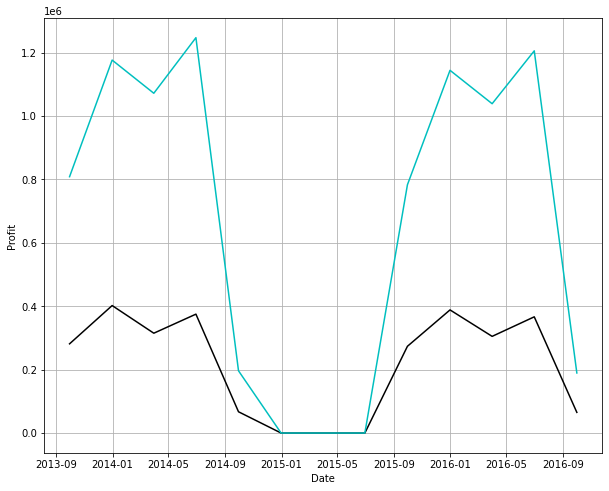

In [46]:
dc = df[df['Product_Category'] == 'Clothing'][['Date', 'Profit']]
dc = dc.set_index(dc['Date']).drop('Date', axis = 1).resample('Q').sum()
plt.figure(figsize = (10, 8))
sns.lineplot(x = dc.index, y = dc['Profit'], color = 'black')

dc = df[df['Product_Category'] == 'Accessories'][['Date', 'Profit']]
dc = dc.set_index(dc['Date']).drop('Date', axis = 1).resample('Q').sum()
sns.lineplot(x = dc.index, y = dc['Profit'], color = 'c')
plt.grid()

In [47]:
dt = df.copy()
dt = dt.set_index(dt['Date']).drop('Date', axis = 1).resample('Q').sum()
dt.head()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost,Calculated_Revenue
Date,,,,,,,,,,,
2011-03-31,8628,1122138,19406,1106,699849,1182808.74,646397,1374911,2038631.1,1374911,2021308
2011-06-30,10071,1276985,21944,1238,740241,1258409.71,673319,1418138,2106286.2,1418138,2091457
2011-09-30,11743,1472052,24054,1433,846602,1437670.91,787915,1660095,2475899.8,1660095,2448010
2011-12-31,12100,1512272,26288,1483,825303,1420290.69,773670,1630443,2438733.3,1630443,2404113
2012-03-31,8628,1122696,19406,1116,699849,1182808.74,655478,1399698,2073025.7,1399698,2055176


In [48]:
dt.drop(['Day', 'Year', 'Customer_Age'], axis = 1, inplace = True)
dt.head()

,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost,Calculated_Revenue
Date,,,,,,,,
2011-03-31,1106,699849,1182808.74,646397,1374911,2038631.1,1374911,2021308
2011-06-30,1238,740241,1258409.71,673319,1418138,2106286.2,1418138,2091457
2011-09-30,1433,846602,1437670.91,787915,1660095,2475899.8,1660095,2448010
2011-12-31,1483,825303,1420290.69,773670,1630443,2438733.3,1630443,2404113
2012-03-31,1116,699849,1182808.74,655478,1399698,2073025.7,1399698,2055176


<AxesSubplot:xlabel='Date'>

<Figure size 1440x1152 with 0 Axes>

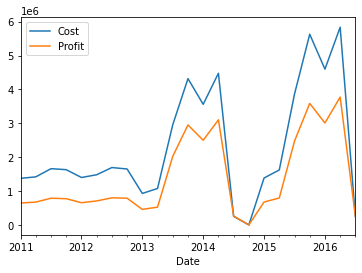

In [49]:
plt.figure(figsize = (20, 16))
dt[['Cost', 'Profit']].plot.line()

###### The country with most buying bikes

In [51]:
df[df['Product_Category'] == 'Bikes'].groupby('Country')['Order_Quantity'].sum().sort_values(ascending = False).head(1)

Country
United States    11192
Name: Order_Quantity, dtype: int64

In [52]:
#Country with highest order of Road Bikes
df[(df['Product_Category'] == 'Bikes') & (df['Sub_Category'] == 'Road Bikes')].groupby('Country')['Order_Quantity'].sum().sort_values(ascending = False).head(1)

Country
Australia    6058
Name: Order_Quantity, dtype: int64

In [53]:
#Country with highest order of Mountain Bikes
df[(df['Product_Category'] == 'Bikes') & (df['Sub_Category'] == 'Mountain Bikes')].groupby('Country')['Order_Quantity'].sum().sort_values(ascending = False).head(1)

Country
United States    4030
Name: Order_Quantity, dtype: int64

In [54]:
#Country with highest order of Mountain Bikes
df[(df['Product_Category'] == 'Bikes') & (df['Sub_Category'] == 'Touring Bikes')].groupby('Country')['Order_Quantity'].sum().sort_values(ascending = False).head(1)

Country
United States    1414
Name: Order_Quantity, dtype: int64

### Data Preprocessing 

In [55]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,123.6,590,360,950.0,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,123.6,590,360,950.0,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,123.6,1366,1035,2401.0,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,123.6,1188,900,2088.0,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,123.6,238,180,418.0,180,418


In [62]:
col = ['Month', 'Age_Group', 'Customer_Gender', 'Country', 'Product_Category', 'Sub_Category', 'Product']
for i in col:
    le = LabelEncoder()
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [64]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,9,2013,19,3,1,1,British Columbia,0,0,12,8,45,123.6,590,360,950.0,360,950
1,2015-11-26,26,9,2015,19,3,1,1,British Columbia,0,0,12,8,45,123.6,590,360,950.0,360,950
2,2014-03-23,23,7,2014,49,0,1,0,New South Wales,0,0,12,23,45,123.6,1366,1035,2401.0,1035,2401
3,2016-03-23,23,7,2016,49,0,1,0,New South Wales,0,0,12,20,45,123.6,1188,900,2088.0,900,2088
4,2014-05-15,15,8,2014,47,0,0,0,New South Wales,0,0,12,4,45,123.6,238,180,418.0,180,418


#### Using KMeans Classifier

In [74]:
x = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, -8, -7, -6]].values
y = df.iloc[:, 9]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [66]:
kmeans = KMeans(n_clusters = df['Product_Category'].nunique(), init = 'k-means++', random_state = 42)

In [67]:
kmeans.fit(x_train, y_train)

KMeans(n_clusters=3, random_state=42)

In [68]:
labels = kmeans.labels_

In [69]:
y_pred = kmeans.predict(x_test)

In [76]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(x)

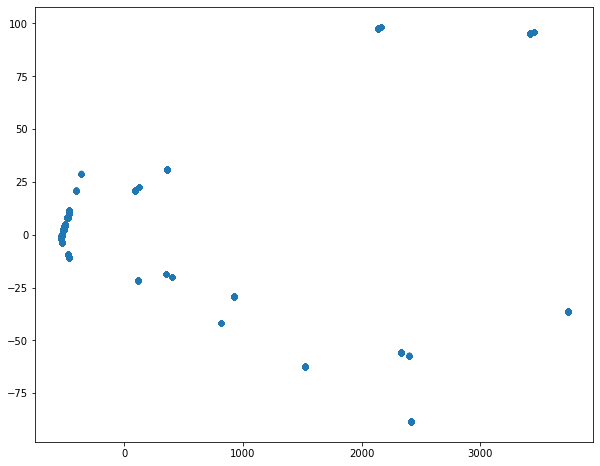

In [77]:
plt.figure(figsize = (10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap = 'rainbow', marker = 'o', s = 20)

In [83]:
accuracy_score(y_test, y_pred)

0.7641459358080611